In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv")

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
df.duplicated('CustomerId').sum()

0

In [8]:
df = df.set_index('CustomerId')

In [13]:
df['Geography'].value_counts()

2    5014
1    2509
0    2477
Name: Geography, dtype: int64

In [12]:
df.replace({"Geography":{'France':2,"Germany":1,"Spain":0}},inplace = True)

In [19]:
df["Gender"].value_counts()

0    5457
1    4543
Name: Gender, dtype: int64

In [18]:
df.replace({"Gender":{"Female":1,"Male":0}},inplace = True)

In [23]:
df["Num Of Products"].value_counts()

0    5084
1    4916
Name: Num Of Products, dtype: int64

In [22]:
df.replace({"Num Of Products":{1:0,2:1,3:1,4:1}},inplace = True)

In [24]:
df["Has Credit Card"].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [25]:
df["Is Active Member"].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [26]:
df.loc[(df["Balance"]==0),"Churn"].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [27]:
df["Zero Balance"] = np.where(df['Balance']>0,1,0)

<AxesSubplot:>

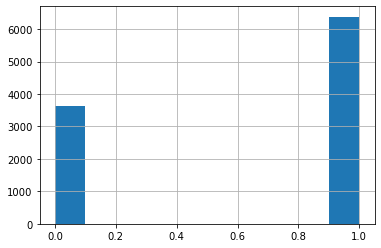

In [28]:
df["Zero Balance"].hist()

In [29]:
df.groupby(["Churn","Geography"]).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [6]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [30]:
y = df['Churn']
x = df.drop(['Surname','Churn'],axis =1)

In [31]:
x.shape,y.shape

((10000, 11), (10000,))